# USL MID EXAM

##### DATA SET DESCRIPTION : 


This dataset contains an airline passenger satisfaction survey. 


* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

*  Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

### 1. Data Understanding (8 marks)
#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and  types of variables? (1 mark)


In [20]:
# importing the needed libraries
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

In [21]:
df = pd.read_csv('data_set.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


#### b Calculate five-point summary for numerical variables (1 MARK) 

In [22]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1143.000000
mean,65317.478603,38.803493,1206.896070,2.734498,3.070742,2.761572,2.946725,3.227074,3.237555,3.423581,3.367686,3.415721,3.297817,3.613100,3.334498,3.649782,3.282096,15.389520,15.580927
std,37080.695046,15.256054,1016.733914,1.329233,1.540613,1.408611,1.276383,1.355822,1.350791,1.351496,1.350409,1.260660,1.331912,1.158581,1.226488,1.184310,1.312222,34.609109,34.246739
min,146.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33680.000000,26.000000,402.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64701.000000,40.000000,846.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,96804.000000,50.000000,1773.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,15.000000,15.000000
max,129860.000000,80.000000,4243.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,315.000000,307.000000


#### c. Is there any categorical feature present in this data ? Summarize observations for categorical variables – no. of categories, % observations in each category.  (2 MARK)

In [37]:
df_categorical = df.select_dtypes(include = ('object'))
df_categorical.head()

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business


In [24]:
# YES THERE ARE CATEGORICAL VARIABLES PRESENT 

In [38]:
# number of categories 
print("number of categories in each categorical varaible ")

for k in df_categorical:
    print('/n% values in columns:', k)
    print()
    print(df_categorical[k].value_counts()/len(df_categorical[k]*100))

number of categories in each categorical varaible 
/n% values in columns: Gender

Female    0.510917
Male      0.489083
Name: Gender, dtype: float64
/n% values in columns: Customer Type

Loyal Customer       0.831441
disloyal Customer    0.168559
Name: Customer Type, dtype: float64
/n% values in columns: Type of Travel

Business travel    0.69083
Personal Travel    0.30917
Name: Type of Travel, dtype: float64
/n% values in columns: Class

Business    0.488210
Eco         0.436681
Eco Plus    0.075109
Name: Class, dtype: float64


#### d. Generate the covariance and correlation tables for the data (2 MARK)

In [35]:
df_num = df.select_dtypes(include = [np.number])
df_num.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [36]:
print("covaraince of the data" , np.cov(df_num,rowvar=False))

covaraince of the data [[ 1.37497795e+09 -5.29259468e+03  4.63997694e+06 -3.46917352e+03
  -2.69656186e+03 -2.36071533e+03 -1.30922361e+03  2.88761325e+03
   4.74764703e+02  2.64656283e+03  3.78947123e+02  1.65003862e+03
   1.73451643e+03  3.68797379e+03  2.14309764e+03  3.37455325e+03
   2.22268043e+03  2.00378265e+04 -2.35853314e+04]
 [-5.29259468e+03  2.32747191e+02  1.47797606e+03  3.45508749e-01
   1.02440300e+00  4.82826671e-01 -4.98137234e-02  5.67387852e-01
   4.09392463e+00  4.29484762e+00  1.29346963e+00  5.11833145e-01
   1.00874889e+00 -1.38903182e+00  9.02326931e-01 -1.19912511e+00
   1.28100666e+00 -1.73735648e+01 -1.58249469e+01]
 [ 4.63997694e+06  1.47797606e+03  1.03374785e+06 -4.63426115e+00
  -2.90660679e+01  3.12356880e+01  7.66666107e+00  6.73444247e+01
   3.28642718e+02  2.36523082e+02  2.08254156e+02  1.52739048e+02
   1.77860525e+02  9.65226914e+01  1.01727102e+02  9.02887448e+01
   1.29660463e+02 -6.11496195e+02 -8.02134623e+02]
 [-3.46917352e+03  3.45508749e-0

In [27]:
print("coeffeicient of the data", np.corrcoef(df_num))

coeffeicient of the data [[1.         0.99921323 0.99999242 ... 0.99973807 0.99981299 0.99869437]
 [0.99921323 1.         0.99935873 ... 0.99985478 0.99978885 0.99992298]
 [0.99999242 0.99935873 1.         ... 0.99981928 0.99987988 0.99888459]
 ...
 [0.99973807 0.99985478 0.99981928 ... 1.         0.99999277 0.99960161]
 [0.99981299 0.99978885 0.99987988 ... 0.99999277 1.         0.99949438]
 [0.99869437 0.99992298 0.99888459 ... 0.99960161 0.99949438 1.        ]]


In [29]:
df.drop('id',axis=1).corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.095284,0.017038,0.043585,0.022468,-0.002558,0.027431,0.198659,0.208301,0.062784,0.026613,0.049644,-0.078586,0.048223,-0.066368,0.063989,-0.032905,-0.030327
Flight Distance,0.095284,1.000000,-0.003429,-0.018556,0.021810,0.005908,0.048853,0.239292,0.172128,0.151677,0.119164,0.131340,0.081940,0.081577,0.074983,0.097184,-0.017378,-0.023069
Inflight wifi service,0.017038,-0.003429,1.000000,0.297306,0.715463,0.348187,0.146494,0.449944,0.118127,0.238022,0.139477,0.200229,0.134740,0.006267,0.128009,0.138696,0.039930,0.030863
Departure/Arrival time convenient,0.043585,-0.018556,0.297306,1.000000,0.436358,0.486454,0.002346,0.025941,0.030097,0.033284,0.089711,0.045529,0.102519,0.122549,0.112283,0.030332,0.003073,0.014187
Ease of Online booking,0.022468,0.021810,0.715463,0.436358,1.000000,0.514120,0.062243,0.377562,0.045750,0.093459,0.044544,0.159019,0.061262,0.003197,0.057319,0.031218,0.016968,0.016733
Gate location,-0.002558,0.005908,0.348187,0.486454,0.514120,1.000000,-0.020785,0.008361,-0.023392,0.005796,-0.018275,0.020139,0.064076,-0.033277,-0.014088,0.004806,-0.006060,-0.006086
Food and drink,0.027431,0.048853,0.146494,0.002346,0.062243,-0.020785,1.000000,0.281714,0.557600,0.628484,0.093544,0.034159,0.039284,0.067301,0.068079,0.665077,0.019834,0.013931
Online boarding,0.198659,0.239292,0.449944,0.025941,0.377562,0.008361,0.281714,1.000000,0.453339,0.324895,0.164737,0.134094,0.092851,0.179928,0.115981,0.351255,-0.031430,-0.036128
Seat comfort,0.208301,0.172128,0.118127,0.030097,0.045750,-0.023392,0.557600,0.453339,1.000000,0.591351,0.118708,0.098849,0.058419,0.171266,0.063272,0.688168,-0.013547,-0.016362
Inflight entertainment,0.062784,0.151677,0.238022,0.033284,0.093459,0.005796,0.628484,0.324895,0.591351,1.000000,0.458515,0.322030,0.374826,0.110397,0.434216,0.693188,-0.018030,-0.020765


##### e. Create Visualization plots to find the relationship amongst the variables. (2 MARK) 

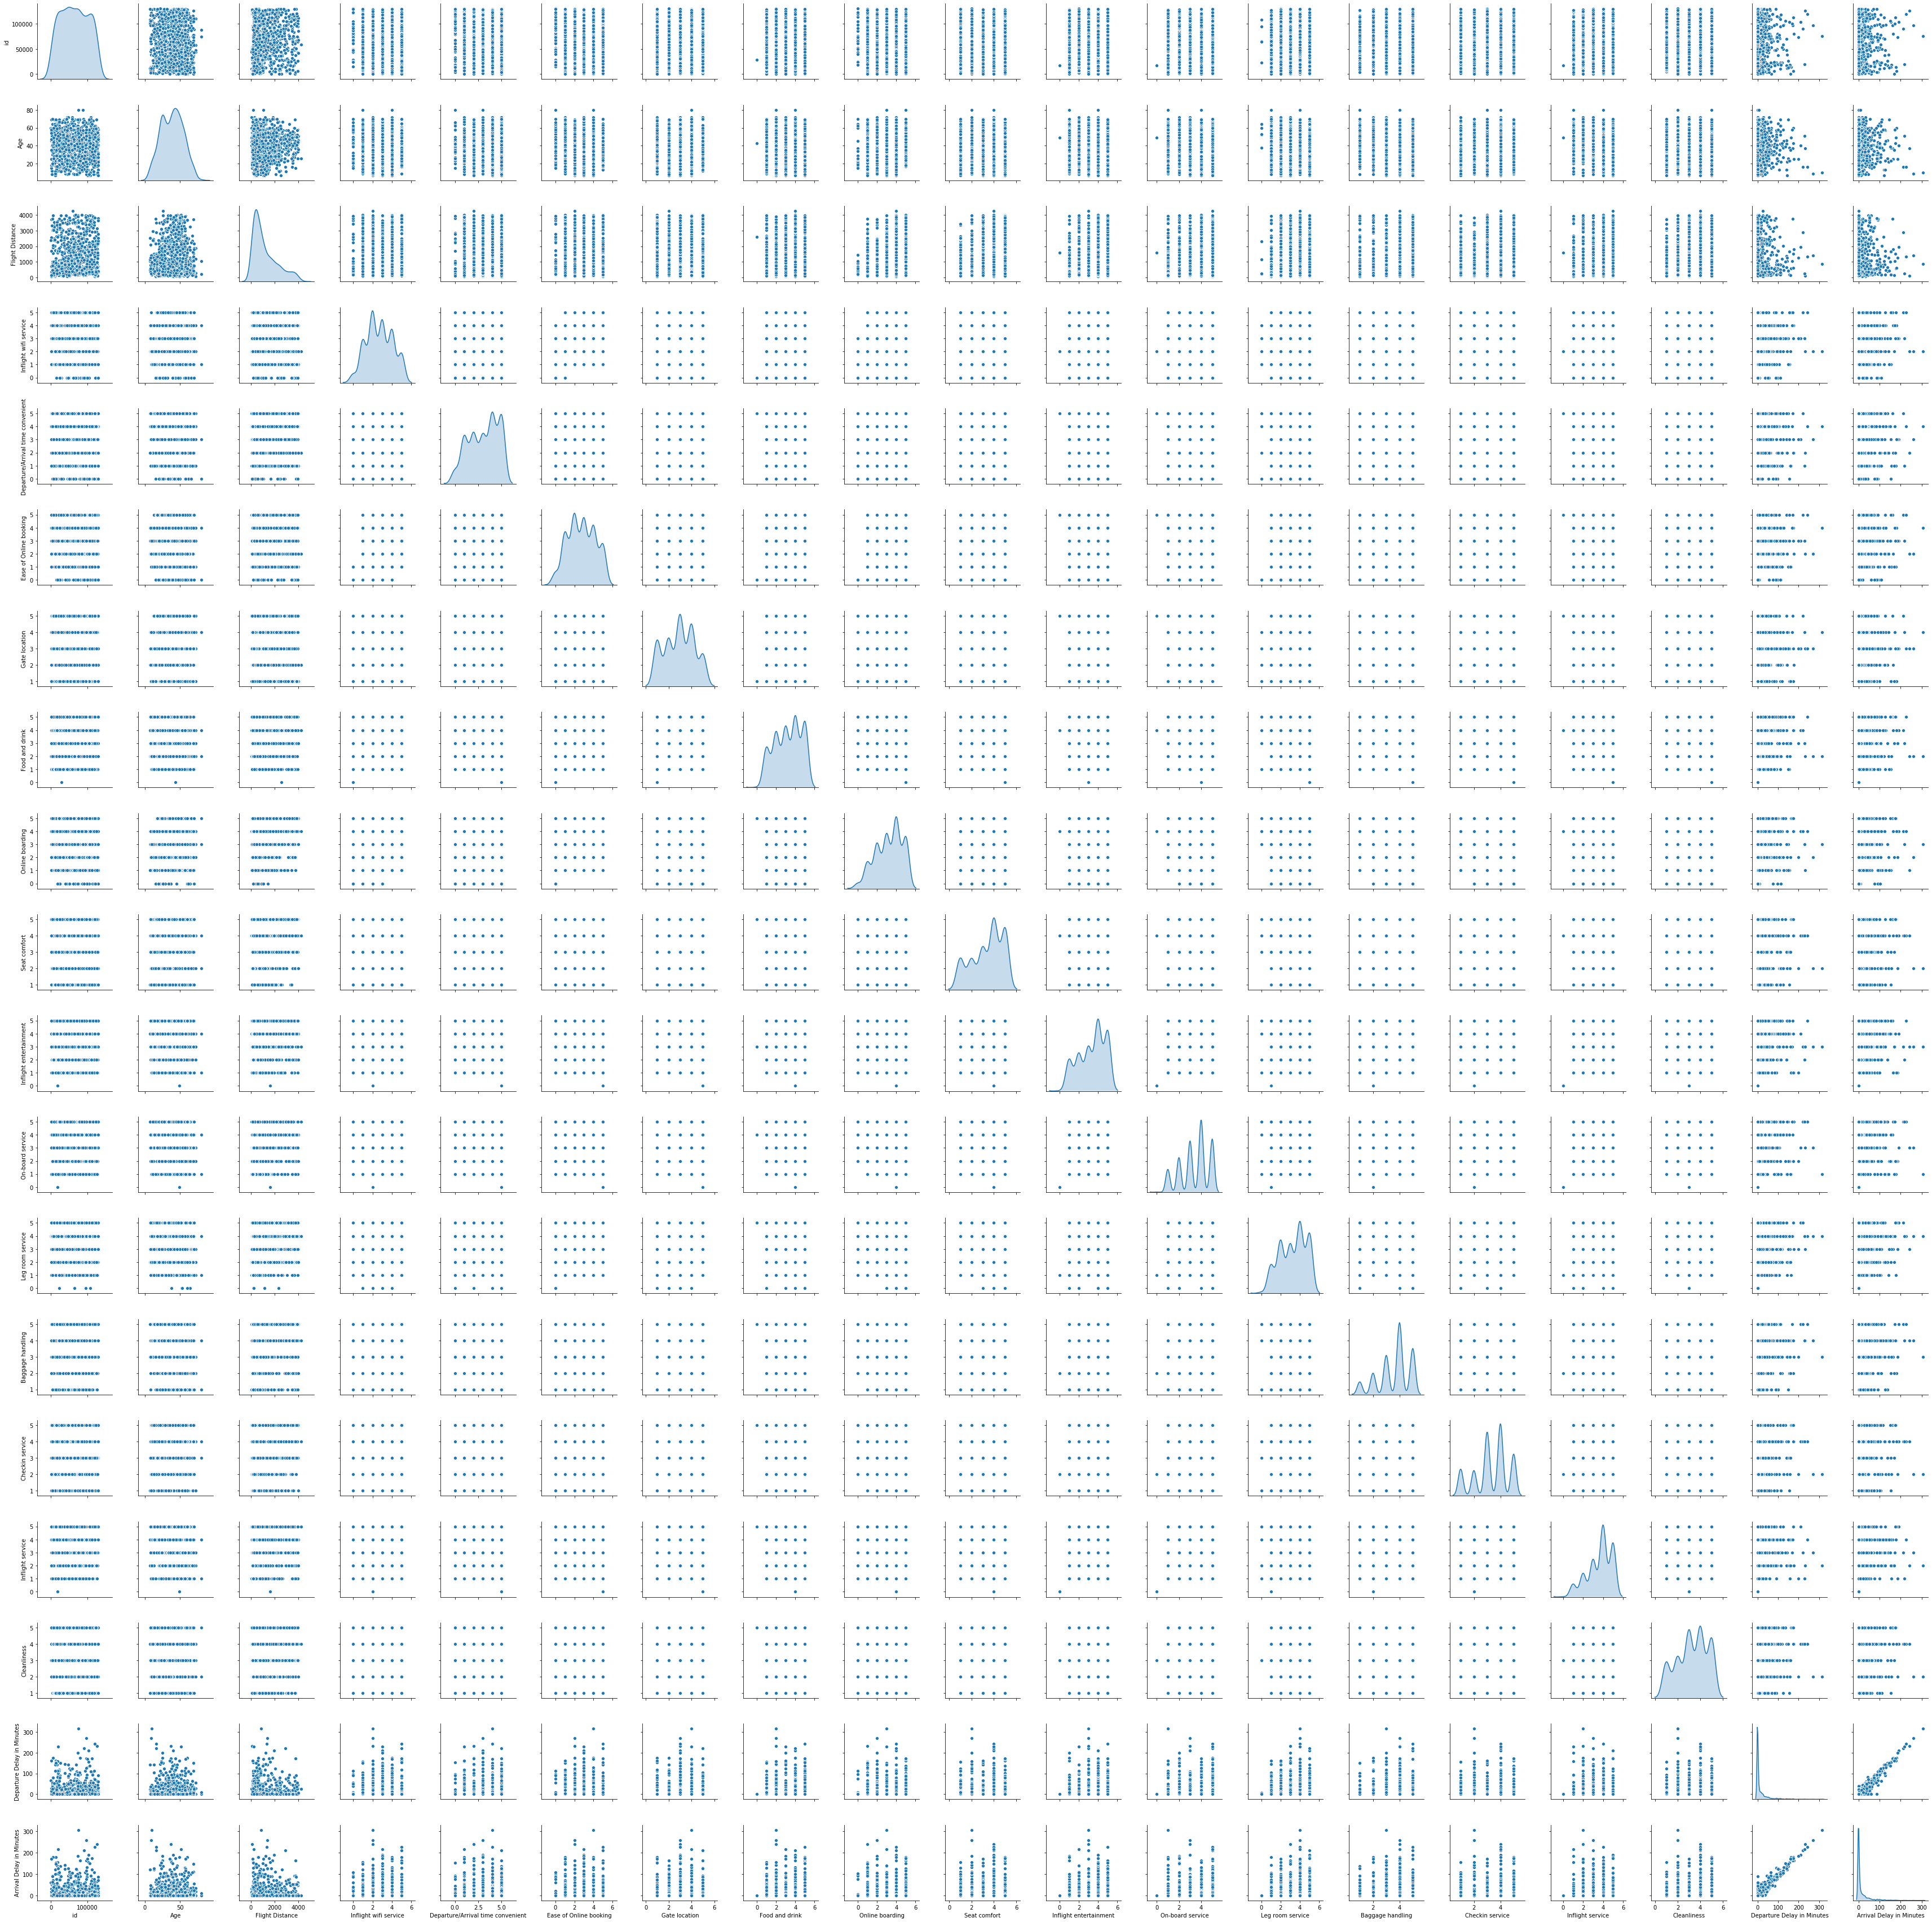

In [28]:
sns.pairplot(data = df,diag_kind = 'kde')
plt.show()

In [32]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             2
dtype: int64

In [33]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [34]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### 2a.  Will PCA can be applicable on this data ? (5 marks)

### 2b.  Print the top 5 eigen values and eigen vectors. Howmuch pecentage of varaiance in the data is explained by this top 5 principle components cummulatively ? (12 marks)

In [154]:
# PCA IS APPLICABLE IN THE DATASET only after categorical encoding 
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
for i in df.select_dtypes(exclude=np.number):
    df[i] = ord_enc.fit_transform(df[[i]])

In [155]:
df.dropna(inplace=True)

In [156]:
df_new = StandardScaler().fit_transform(df)

In [157]:
cov_mat = np.cov(df_new.T)
cov_mat[0:5]

array([[ 1.00087413e+00,  8.26056451e-02,  2.47171591e-02,
        -9.36392676e-03, -1.38350546e-02, -1.26317362e-01,
         1.23179974e-01, -7.04460430e-02, -4.72441996e-02,
        -4.52359786e-02, -2.76862784e-02,  5.74867897e-02,
         9.48684351e-03,  5.28565788e-02,  7.57434002e-03,
         3.53287117e-02,  3.51507368e-02,  8.59197271e-02,
         4.71639691e-02,  7.69099595e-02,  4.57194946e-02,
         1.56275820e-02, -1.86051990e-02],
       [ 8.26056451e-02,  1.00087413e+00, -1.11779188e-02,
        -9.85673083e-03, -2.32147479e-02, -4.37110576e-02,
         2.92064837e-02, -5.17483177e-02, -1.31901554e-02,
        -7.26299889e-02, -2.07867076e-02, -2.21437795e-02,
        -5.05491471e-02, -4.94544556e-02,  9.19284033e-03,
         2.72694496e-04,  2.52485371e-02,  4.47916278e-02,
         3.37783290e-02,  4.44958651e-02, -1.86296434e-02,
         5.69613474e-02,  5.14991738e-02],
       [ 2.47171591e-02, -1.11779188e-02,  1.00087413e+00,
        -2.76085405e-01, -2.8

In [158]:
eig_val , eig_vec = np.linalg.eig(cov_mat)

In [159]:
eig_val

array([4.17960883, 2.40894842, 2.23786755, 1.95482098, 1.73908027,
       1.52770343, 1.10902545, 0.03830553, 0.94638642, 0.92356321,
       0.89133147, 0.83052944, 0.16749849, 0.67043741, 0.22937521,
       0.26824875, 0.3058242 , 0.32483348, 0.39205942, 0.51118224,
       0.48542786, 0.43458892, 0.44345789])

In [160]:
list_eig_val = list(eig_val)
list_eig_val.sort(reverse = True)
list_eig_val

[4.179608834688483,
 2.4089484153790877,
 2.23786755460731,
 1.9548209760434412,
 1.7390802738541897,
 1.5277034299352825,
 1.1090254506330912,
 0.946386424593949,
 0.9235632058152659,
 0.8913314739265221,
 0.8305294407341833,
 0.6704374107058905,
 0.5111822436738347,
 0.4854278644316593,
 0.44345789344917724,
 0.43458892143154254,
 0.39205942352256506,
 0.3248334844139714,
 0.3058242015981048,
 0.26824874518994757,
 0.22937521289965399,
 0.16749848727953973,
 0.03830552629821098]

In [66]:
# we can use either kaiser criterion or cumsum to determine the percentage variation explained

In [161]:
val_opt = [eig_val[i] for i in range(len(eig_val)) if eig_val[i]>1]
val_opt

[4.179608834688483,
 2.4089484153790877,
 2.23786755460731,
 1.9548209760434412,
 1.7390802738541897,
 1.5277034299352825,
 1.1090254506330912]

In [162]:
# to explain 95 % variation we are going to take cumsum of the percentage variation
percent_var = []
for i in list_eig_val:
    var = (i/sum(list_eig_val))*100
    percent_var.append(var)
    
percent_var

[18.156341396938,
 10.464541436087622,
 9.721361239683924,
 8.491798733980238,
 7.554614897623665,
 6.636387787529761,
 4.8176385628412985,
 4.111129940138512,
 4.011985219110172,
 3.8719696456120785,
 3.607843858742758,
 2.912399460214689,
 2.2205904186932472,
 2.1087126520213326,
 1.9263938868648511,
 1.887866816471177,
 1.703117450198649,
 1.4110860306420474,
 1.328509157502304,
 1.1652802904776909,
 0.9964125443599927,
 0.7276182625699388,
 0.1664003116960446]

In [163]:
np.cumsum(percent_var)

array([ 18.1563414 ,  28.62088283,  38.34224407,  46.83404281,
        54.3886577 ,  61.02504549,  65.84268405,  69.95381399,
        73.96579921,  77.83776886,  81.44561272,  84.35801218,
        86.5786026 ,  88.68731525,  90.61370914,  92.50157595,
        94.2046934 ,  95.61577943,  96.94428859,  98.10956888,
        99.10598143,  99.83359969, 100.        ])

In [164]:
# THE FIRST FIVE COMPONENTS EXPLAIN 54.3888

In [165]:
eigen_vector = eig_vec[:,0:5]
eigen_vector

array([[ 0.04285258, -0.10439957,  0.06350304, -0.03934809,  0.08855484],
       [-0.0044743 , -0.05331381,  0.06337982, -0.1149425 ,  0.05949474],
       [-0.05369156, -0.04006649,  0.12975764, -0.00738616,  0.11369232],
       [ 0.07430344, -0.0206643 , -0.14545493,  0.10840297,  0.05167185],
       [-0.15783322,  0.12363222,  0.03904728, -0.07937896, -0.51467763],
       [-0.2093011 ,  0.15465364, -0.06901015, -0.04903378, -0.48362636],
       [ 0.1590461 , -0.10836004,  0.00088538,  0.04965138,  0.36663738],
       [ 0.21628875,  0.42235657, -0.08874276,  0.04908091,  0.09452793],
       [ 0.08039871,  0.44147505, -0.00144563,  0.00721364, -0.20480002],
       [ 0.16685014,  0.50349127, -0.09269971,  0.09356223,  0.16239837],
       [ 0.06261755,  0.44887659, -0.04355063,  0.07852413,  0.04576233],
       [ 0.28329105, -0.14810764, -0.29086035,  0.01745266, -0.22401676],
       [ 0.30007015,  0.06182519, -0.18453691,  0.11905239,  0.17566332],
       [ 0.3204562 , -0.1629395 , -0.2

In [168]:
df_pca = np.dot(df_new,eigen_vector)
df_pca_df = pd.DataFrame(data = df_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
df_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.222427,-0.386663,-0.205729,-1.147134,-3.586221
1,-3.015031,0.887458,1.482692,0.647370,2.387241
2,2.383542,-2.136380,-0.491243,0.530706,-0.325271
3,-1.485727,2.501537,0.547750,0.720081,1.218758
4,1.107677,-0.314387,-0.682337,0.930016,0.778373


### 3. Build the clustering model on PCA dimensions which are extracting 95 percentage of variance in the original data (25 Marks)

In [71]:
# TO EXPLAIN 95 % VARIATION WE NEED ATLEAST 14 or 15 DIMENSIONS 

In [169]:
eigen_vector_1 = eig_vec[:,0:15]
eigen_vector_1

array([[ 4.28525816e-02, -1.04399573e-01,  6.35030426e-02,
        -3.93480904e-02,  8.85548441e-02, -6.23910948e-02,
         6.19240728e-01,  2.53409643e-02, -2.90442686e-01,
        -3.65914741e-02,  6.58969933e-01, -1.89880450e-01,
         5.20567008e-02,  2.76054236e-03,  2.41141171e-02],
       [-4.47429951e-03, -5.33138118e-02,  6.33798210e-02,
        -1.14942495e-01,  5.94947362e-02, -6.12267535e-02,
         4.84215497e-01,  2.67629439e-03,  7.60070846e-01,
         3.42736030e-01, -8.14912796e-02,  1.62283694e-01,
        -1.88095084e-02, -2.78544700e-02, -2.67063923e-02],
       [-5.36915594e-02, -4.00664876e-02,  1.29757643e-01,
        -7.38615541e-03,  1.13692323e-01,  6.37813025e-01,
         5.39308193e-02,  1.77331370e-04, -1.06222045e-01,
         2.32395917e-01, -4.35598124e-02, -2.62612799e-01,
         1.24808992e-01, -7.40713534e-02, -1.58849929e-02],
       [ 7.43034405e-02, -2.06643005e-02, -1.45454926e-01,
         1.08402971e-01,  5.16718453e-02, -4.32016375

In [172]:
df5 = np.dot(df_new,eigen_vector_1)
df_pca_95 = pd.DataFrame(data = df5,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
df_pca_95.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.222427,-0.386663,-0.205729,-1.147134,-3.586221,0.595332,0.667524,-0.148371,0.462758,0.572381,0.625064,1.862552,-0.209353,0.217423,-0.494581
1,-3.015031,0.887458,1.482692,0.647370,2.387241,2.275483,-0.915134,0.070473,1.868634,0.130426,-0.252688,0.239868,-0.040287,1.187624,0.304612
2,2.383542,-2.136380,-0.491243,0.530706,-0.325271,0.410620,0.269418,0.015239,-1.414385,-0.034685,0.661885,0.634766,0.170561,-0.138725,-0.027993
3,-1.485727,2.501537,0.547750,0.720081,1.218758,0.648158,-0.386566,-0.098374,0.136490,-2.018364,-1.096943,-0.369678,-0.297112,1.339793,-0.641756
4,1.107677,-0.314387,-0.682337,0.930016,0.778373,-0.638666,0.758729,0.045798,0.929877,0.930698,1.513504,-1.161471,-0.206094,0.210943,0.362477


In [174]:
pca = PCA(n_components = 15)
pca.fit(df_pca_95)
scores_k = pca.transform(df_pca_95)
scores_k

array([[-1.22242707e+00,  3.86663065e-01,  2.05728628e-01, ...,
         4.94580892e-01,  2.09352906e-01, -1.48370611e-01],
       [ 3.01503110e+00, -8.87457539e-01, -1.48269182e+00, ...,
        -3.04612178e-01,  4.02871217e-02,  7.04730567e-02],
       [-2.38354211e+00,  2.13638030e+00,  4.91243093e-01, ...,
         2.79929548e-02, -1.70560672e-01,  1.52394571e-02],
       ...,
       [-3.86493400e+00, -6.96699895e-01, -1.19039750e+00, ...,
         2.27170811e-01, -5.64512650e-02,  2.07161566e-03],
       [ 4.33913797e+00,  1.06618975e+00, -5.72253478e-01, ...,
         1.67809524e-01, -1.82161380e-01, -2.36819824e-01],
       [ 2.93106756e+00, -8.10292420e-01, -1.16862834e+00, ...,
         1.68386677e+00,  3.41998100e-02,  1.86730211e-01]])

#### a. Find the optimal K Value. (6 marks)

In [141]:
pca = PCA(n_components = 5)
pca.fit(df_pca_df)
scores_k = pca.transform(df_pca_df)

In [144]:
wccs_k = []
K = range(1,21)
for i in list(K):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++')
    kmeans_pca.fit(scores_k)
    wccs_k.append(kmeans_pca.inertia_)


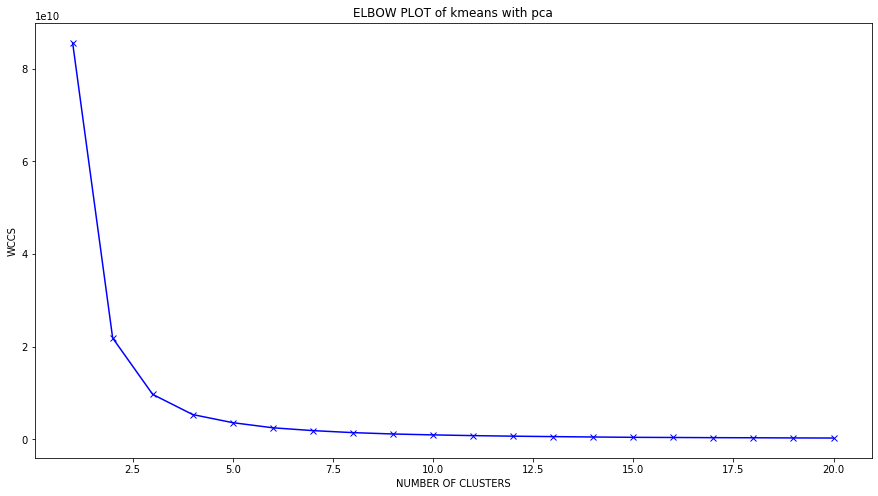

In [145]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),wccs_k,'bx-')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCCS')
plt.title('ELBOW PLOT of kmeans with pca')
plt.show()

In [ ]:
# THE OPTIMAL VALUE OF K SEEMS TO BE 2 .

Text(0.5, 0, 'pca number')

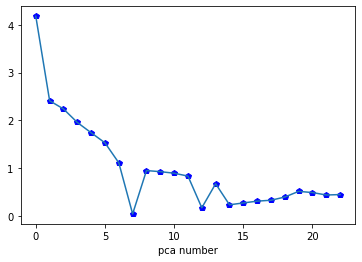

In [194]:
plt.plot(eig_val,'bp')
plt.plot(eig_val)
plt.xlabel('pca number')



#### b.	Apply Clustering with optimal value of k and find out if the data points have been clustered correctly using appropriate visualization (8 marks)

In [121]:
pca = PCA()
pca.fit(data)


PCA()

In [119]:
pca.explained_variance_ratio_.ndim

1

Text(0, 0.5, 'cumulative variance explained ')

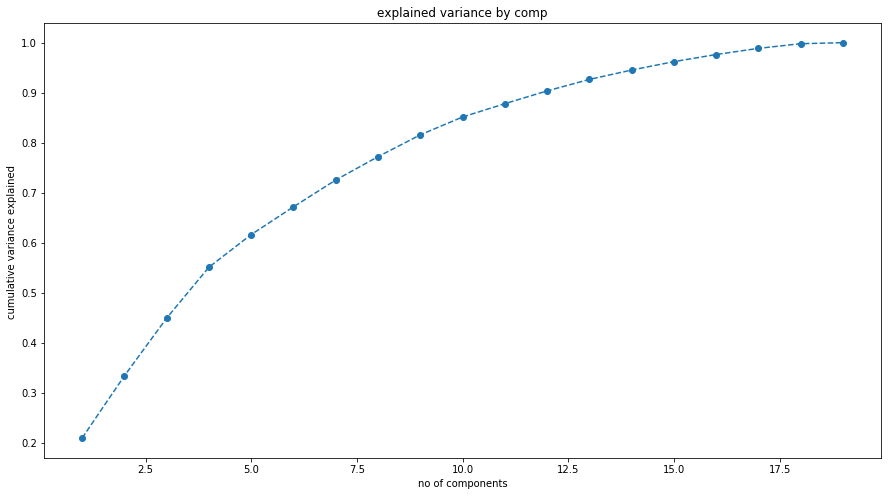

In [122]:
plt.figure(figsize=(15,8))
plt.plot(range(1,20),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title('explained variance by comp')
plt.xlabel('no of components')
plt.ylabel('cumulative variance explained ')

In [123]:
pca = PCA(n_components = 4)
pca.fit(data)

PCA(n_components=4)

In [124]:
pca.transform(data)

array([[-2.05816389,  1.24208305,  0.08858736,  0.6035277 ],
       [ 3.28926073, -1.70176107, -0.97302166, -0.43755778],
       [-2.07988299,  2.24200331,  0.23632315, -0.47304677],
       ...,
       [-3.65141099, -0.8444077 , -1.10945584, -0.22340252],
       [ 4.55858962,  0.56387332, -0.64822734,  1.53070098],
       [ 3.40814123, -1.59061375, -1.0029939 ,  0.22349707]])

In [126]:
scores_pca = pca.transform(data)
scores_pca

array([[-2.05816389,  1.24208305,  0.08858736,  0.6035277 ],
       [ 3.28926073, -1.70176107, -0.97302166, -0.43755778],
       [-2.07988299,  2.24200331,  0.23632315, -0.47304677],
       ...,
       [-3.65141099, -0.8444077 , -1.10945584, -0.22340252],
       [ 4.55858962,  0.56387332, -0.64822734,  1.53070098],
       [ 3.40814123, -1.59061375, -1.0029939 ,  0.22349707]])

In [127]:
# ELBOW CURVE FOR FINDING OPTIMAL K
wccs = []
K = range(1,21)
for i in list(K):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++')
    kmeans_pca.fit(scores_pca)
    wccs.append(kmeans_pca.inertia_)


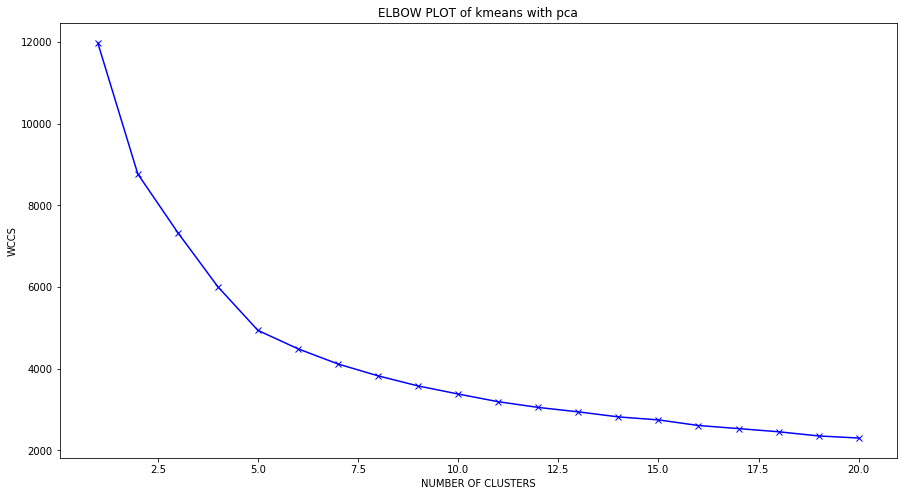

In [128]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),wccs,'bx-')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCCS')
plt.title('ELBOW PLOT of kmeans with pca')
plt.show()

In [183]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++')
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

#### c.	Evaluate the clusters formed using appropriate metrics to support the model built. (6 marks)

#### d.Write down a business interpretation/explanation of the model – Use the cluster centroids to make the bussiness inferences for each cluster groups (5 marks)

In [196]:
kmeans.inertia_

16697.7485316338

In [195]:
kmeans_pca.inertia_

8768.189482166927